

# STEP 2 Analysis and visualisation Base ensemble with and without COVID


## Load results

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from ema_workbench.analysis.plotting import lines, Density,kde_over_time, envelopes, multiple_densities



#load results
from ema_workbench import ema_logging, load_results
#results = load_results(r'./results/1809_policy_run_base_v3_1000.tar.gz')
results = load_results(r'./results/2509_policy_run_base_v4_1000_additional.tar.gz')



experiments, outcomes = results


In [28]:
#check out overview of experiments
experiments

,Expected telecommuting,Natural decay without pandemic,Perception public transport rate of gaining back trust,Variable Car cost increase,Variable distribution EV vehicle fleet,Variable public transport cost increase,scenario,policy,model,model_file
0,0.175600,0.106375,0.120837,-0.000167,0.001456,0.008462,5005,No COVID,CovidModel,Final_model_NO_COV3.vpmx
1,0.226091,0.050606,0.123959,0.041047,-0.009177,0.007545,5006,No COVID,CovidModel,Final_model_NO_COV3.vpmx
2,0.183109,0.051101,0.210127,0.033300,0.019389,-0.003882,5007,No COVID,CovidModel,Final_model_NO_COV3.vpmx
3,0.211287,0.134377,0.253725,-0.024666,0.013719,0.003236,5008,No COVID,CovidModel,Final_model_NO_COV3.vpmx
4,0.200725,0.109960,0.264561,-0.022542,-0.006449,-0.000740,5009,No COVID,CovidModel,Final_model_NO_COV3.vpmx
...,...,...,...,...,...,...,...,...,...,...
1995,0.162873,0.066295,0.140510,0.029708,0.005311,-0.015878,6000,COVID base ensemble,CovidModel,Final_model3.vpmx
1996,0.234343,0.069060,0.184217,-0.023041,-0.000288,-0.009326,6001,COVID base ensemble,CovidModel,Final_model3.vpmx
1997,0.205742,0.116480,0.281195,-0.023933,-0.005708,0.014400,6002,COVID base ensemble,CovidModel,Final_model3.vpmx
1998,0.198666,0.051765,0.205642,-0.023634,0.017550,-0.011805,6003,COVID base ensemble,CovidModel,Final_model3.vpmx


In [29]:
#observe outcomes
outcomes

{'TIME': array([[2019.  , 2019.25, 2019.5 , ..., 2039.5 , 2039.75, 2040.  ],
        [2019.  , 2019.25, 2019.5 , ..., 2039.5 , 2039.75, 2040.  ],
        [2019.  , 2019.25, 2019.5 , ..., 2039.5 , 2039.75, 2040.  ],
        ...,
        [2019.  , 2019.25, 2019.5 , ..., 2039.5 , 2039.75, 2040.  ],
        [2019.  , 2019.25, 2019.5 , ..., 2039.5 , 2039.75, 2040.  ],
        [2019.  , 2019.25, 2019.5 , ..., 2039.5 , 2039.75, 2040.  ]]),
 'Total car movements per month': array([[6.1546430e+08, 6.1567730e+08, 6.1610035e+08, ..., 6.6469410e+08,
         6.6526483e+08, 6.6583580e+08],
        [6.1546430e+08, 6.1567730e+08, 6.1610035e+08, ..., 6.5809190e+08,
         6.5865070e+08, 6.5920970e+08],
        [6.1546430e+08, 6.1567730e+08, 6.1610035e+08, ..., 6.5937910e+08,
         6.5994054e+08, 6.6050230e+08],
        ...,
        [6.1546430e+08, 6.1569230e+08, 6.1612826e+08, ..., 6.6780860e+08,
         6.6838106e+08, 6.6895420e+08],
        [6.1546430e+08, 6.1569230e+08, 6.1612826e+08, ..., 6.

In [30]:
#get random indexes to plot behaviours
import numpy as np
import random
amount_runs=np.arange(0,10)
random_index=[]
for i in amount_runs:
    random_i=random.randint(0,2000)
    random_index.append(random_i)
random_index

[111, 1060, 652, 75, 1218, 137, 1781, 1724, 1, 934]

## Test best plot style

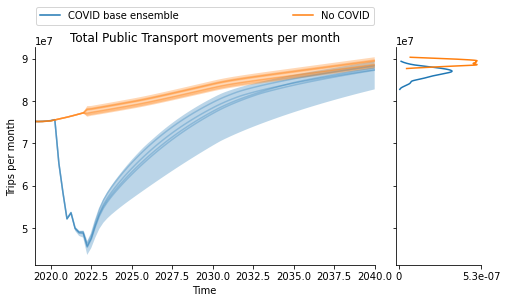

In [31]:
lines(experiments, outcomes,outcomes_to_show = 'Total Public Transport movements per month', group_by = 'policy', experiments_to_show=random_index, density =Density.KDE, show_envelope = True)
fig = plt.gcf()
fig.set_size_inches(8,4)
ax = fig.get_axes()

ax[0].set_ylabel('Trips per month')
for line in ax[0].get_lines():
    line.set_alpha(0.3)
sns.despine()

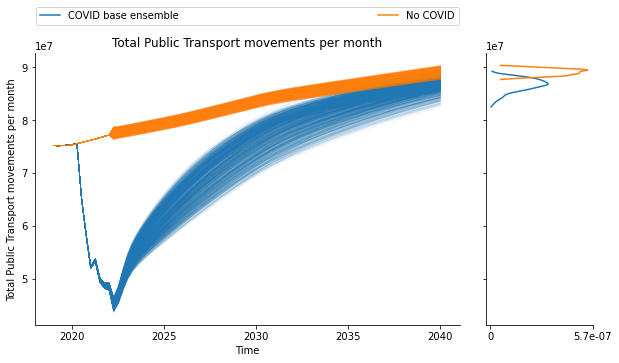

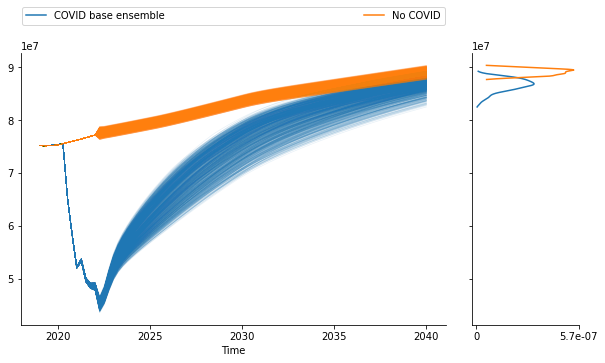

In [7]:
fig, _ = lines(experiments, outcomes,outcomes_to_show = 'Total Public Transport movements per month', density =Density.KDE, group_by = 'policy')

fig.set_size_inches(10,5)
ax = fig.get_axes()

for line in ax[0].get_lines():
    line.set_alpha(0.1)
    line.set_linewidth(0.7)
sns.despine()


#Pt trips
fig, _ = lines(experiments, outcomes,outcomes_to_show = "Total Public Transport movements per month" , density =Density.KDE,group_by = 'policy',  titles=False, ylabels=None)

fig.set_size_inches(10,5)
ax = fig.get_axes()

for line in ax[0].get_lines():
    line.set_alpha(0.1)
    line.set_linewidth(0.7)
sns.despine()

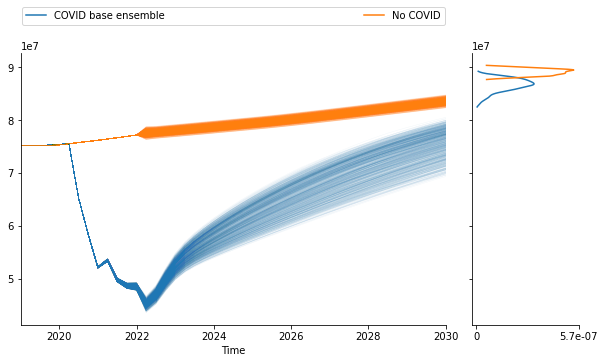

In [15]:
fig, _ = lines(experiments, outcomes,outcomes_to_show = 'Total Public Transport movements per month', density =Density.KDE, group_by = 'policy', titles=False, ylabels=None)

fig.set_size_inches(10,5)
ax = fig.get_axes()

for line in ax[0].get_lines():
    line.set_alpha(0.05)
    line.set_linewidth(0.5)
    
ax[0].set(xlim=(2019,2030)) 
sns.despine()


# Trips PT

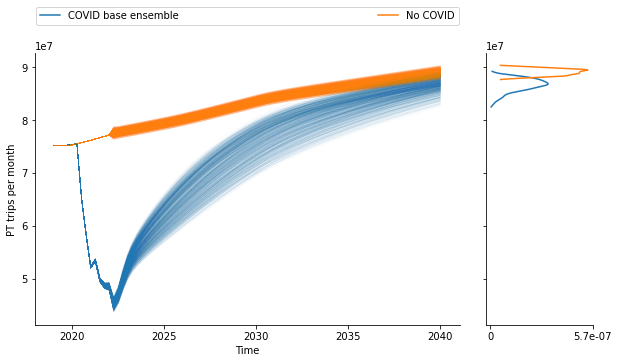

In [13]:
fig, _ = lines(experiments, outcomes,outcomes_to_show = 'Total Public Transport movements per month', density =Density.KDE, group_by = 'policy', titles=False, ylabels=None)

fig.set_size_inches(10,5)
ax = fig.get_axes()

ax[0].set_ylabel('PT trips per month')
for line in ax[0].get_lines():
    line.set_alpha(0.05)
    line.set_linewidth(0.5)
sns.despine()
plt.savefig('figs/policy/policy_pt_trips.png')

# Trips telecommuting

C:\Users\thomas\anaconda3\lib\site-packages\ema_workbench\analysis\plotting_util.py:371: RuntimeWarning: invalid value encountered in true_divide
  kde_x = kde_x / np.max(kde_x)
singular matrix


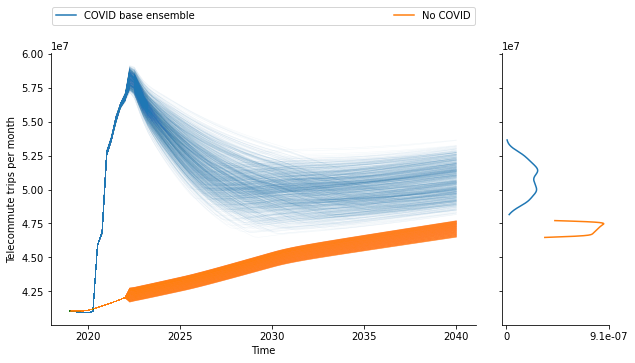

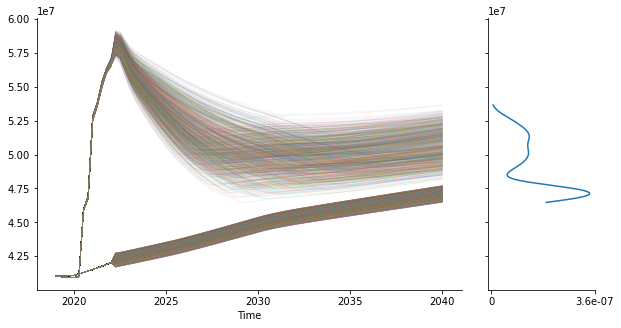

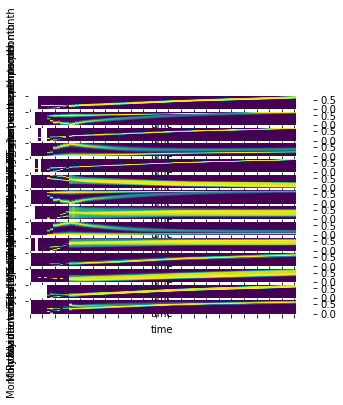

In [12]:
fig, _ = lines(experiments, outcomes,outcomes_to_show = 'Total Telecommuting movements per month', density =Density.KDE, group_by = 'policy', titles=False, ylabels=None)

fig.set_size_inches(10,5)
ax = fig.get_axes()

ax[0].set_ylabel('Telecommute trips per month')
for line in ax[0].get_lines():
    line.set_alpha(0.05)
    line.set_linewidth(0.5)
sns.despine()
plt.savefig('figs/policy/policy_tele_trips.png')

#tele trips
fig, _ = lines(experiments, outcomes,outcomes_to_show = "Total Telecommuting movements per month" , density =Density.KDE, titles=False, ylabels=None)

fig.set_size_inches(10,5)
ax = fig.get_axes()

for line in ax[0].get_lines():
    line.set_alpha(0.1)
    line.set_linewidth(0.7)
sns.despine()

fig, axes = kde_over_time(experiments, outcomes, log=True)

plt.show()

# Additional outcomes


## Trips per month


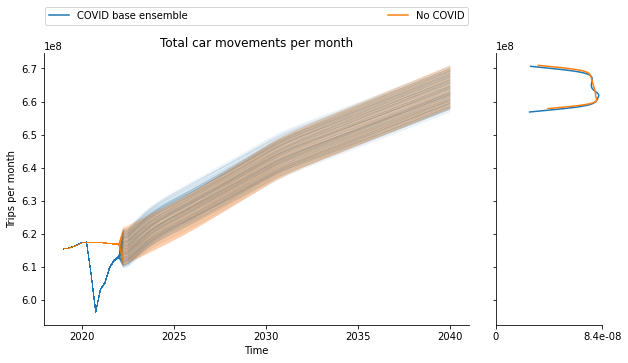

In [109]:
fig, _ = lines(experiments, outcomes,outcomes_to_show = 'Total car movements per month', density =Density.KDE, group_by = 'policy')

fig.set_size_inches(10,5)
ax = fig.get_axes()

ax[0].set_ylabel('Trips per month')
for line in ax[0].get_lines():
    line.set_alpha(0.05)
    line.set_linewidth(0.5)
sns.despine()
plt.savefig('figs/policy/policy_car_trips.png')

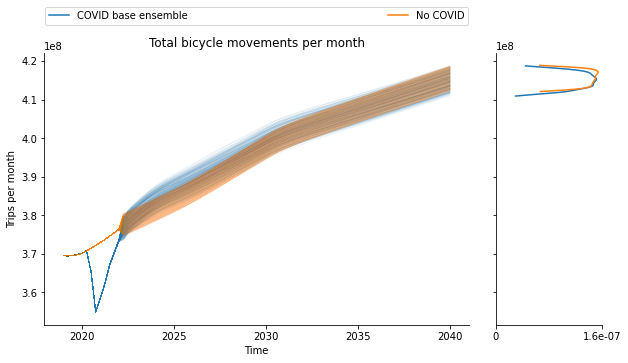

In [110]:
fig, _ = lines(experiments, outcomes,outcomes_to_show = 'Total bicycle movements per month', density =Density.KDE, group_by = 'policy')

fig.set_size_inches(10,5)
ax = fig.get_axes()

ax[0].set_ylabel('Trips per month')
for line in ax[0].get_lines():
    line.set_alpha(0.05)
    line.set_linewidth(0.5)
sns.despine()
plt.savefig('figs/policy/policy_bike_trips.png')

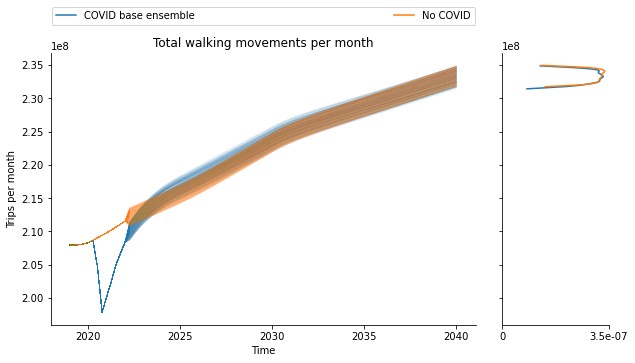

In [111]:
fig, _ = lines(experiments, outcomes,outcomes_to_show = 'Total walking movements per month', density =Density.KDE, group_by = 'policy')

fig.set_size_inches(10,5)
ax = fig.get_axes()

ax[0].set_ylabel('Trips per month')
for line in ax[0].get_lines():
    line.set_alpha(0.05)
    line.set_linewidth(0.5)
sns.despine()
plt.savefig('figs/policy/policy_walk_trips.png')

## Modal split



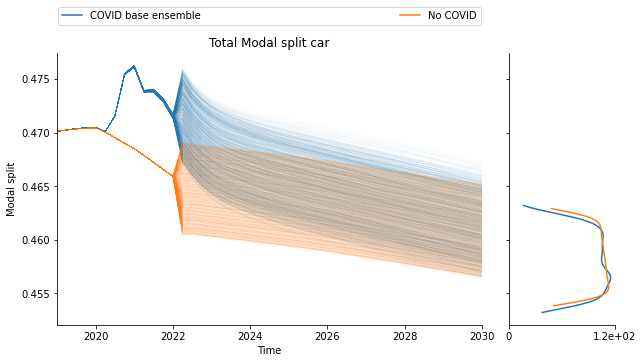

In [20]:
fig, _ = lines(experiments, outcomes,outcomes_to_show = 'Total Modal split car', density =Density.KDE, group_by = 'policy')

fig.set_size_inches(10,5)
ax = fig.get_axes()

ax[0].set_ylabel('Modal split')
for line in ax[0].get_lines():
    line.set_alpha(0.05) #0.1
    line.set_linewidth(0.5) #0.7
    
ax[0].set(xlim=(2019,2030))    
sns.despine()

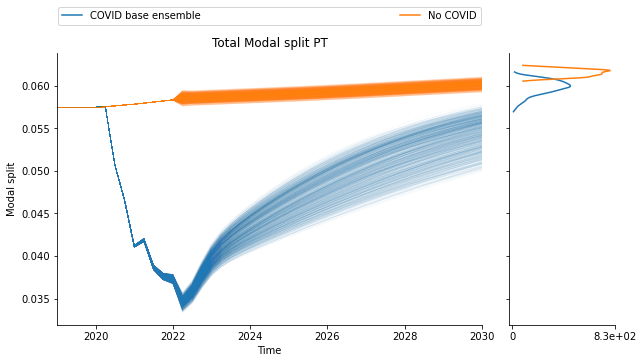

In [24]:
fig, _ = lines(experiments, outcomes,outcomes_to_show = 'Total Modal split PT', density =Density.KDE, group_by = 'policy')

fig.set_size_inches(10,5)
ax = fig.get_axes()

ax[0].set_ylabel('Modal split')
for line in ax[0].get_lines():
    line.set_alpha(0.05) #0.1
    line.set_linewidth(0.5) #0.7
    
ax[0].set(xlim=(2019,2030))    
sns.despine()

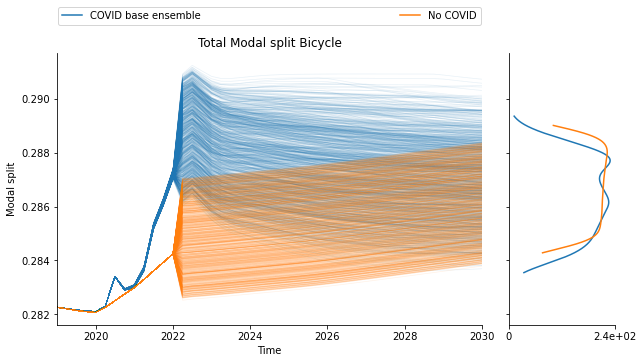

In [21]:
fig, _ = lines(experiments, outcomes,outcomes_to_show = 'Total Modal split Bicycle', density =Density.KDE, group_by = 'policy')

fig.set_size_inches(10,5)
ax = fig.get_axes()

ax[0].set_ylabel('Modal split')
for line in ax[0].get_lines():
    line.set_alpha(0.1)
    line.set_linewidth(0.7)
    
ax[0].set(xlim=(2019,2030))    
sns.despine()

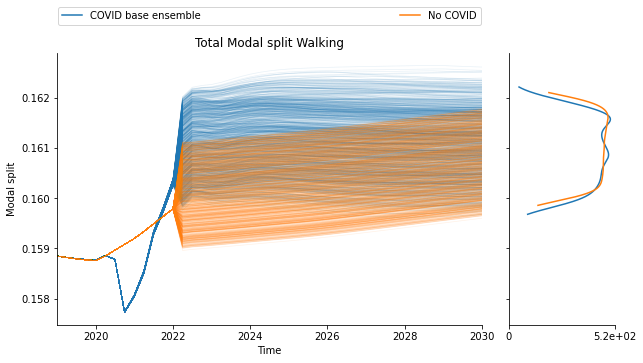

In [23]:
fig, _ = lines(experiments, outcomes,outcomes_to_show = 'Total Modal split Walking', density =Density.KDE, group_by = 'policy')

fig.set_size_inches(10,5)
ax = fig.get_axes()

ax[0].set_ylabel('Modal split')
for line in ax[0].get_lines():
    line.set_alpha(0.1)
    line.set_linewidth(0.7)
    
ax[0].set(xlim=(2019,2030))

sns.despine()

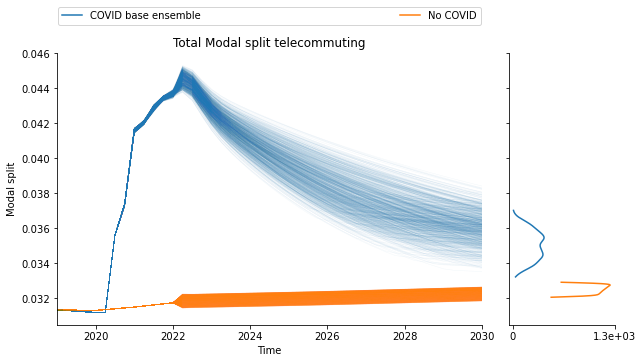

In [26]:
fig, _ = lines(experiments, outcomes,outcomes_to_show = 'Total Modal split telecommuting', density =Density.KDE, group_by = 'policy')

fig.set_size_inches(10,5)
ax = fig.get_axes()

ax[0].set_ylabel('Modal split')
for line in ax[0].get_lines():
    line.set_alpha(0.05) #0.1
    line.set_linewidth(0.5) #0.7
    
ax[0].set(xlim=(2019,2030))    
sns.despine()

### Road intensity

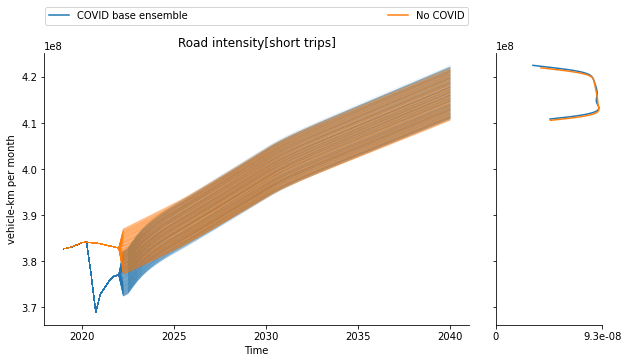

In [120]:
fig, _ = lines(experiments, outcomes,outcomes_to_show = "Road intensity[short trips]", density =Density.KDE, group_by = 'policy')

fig.set_size_inches(10,5)
ax = fig.get_axes()

ax[0].set_ylabel('vehicle-km per month')
for line in ax[0].get_lines():
    line.set_alpha(0.1)
    line.set_linewidth(0.7)
sns.despine()
plt.savefig('figs/policy/policy_inten_short')

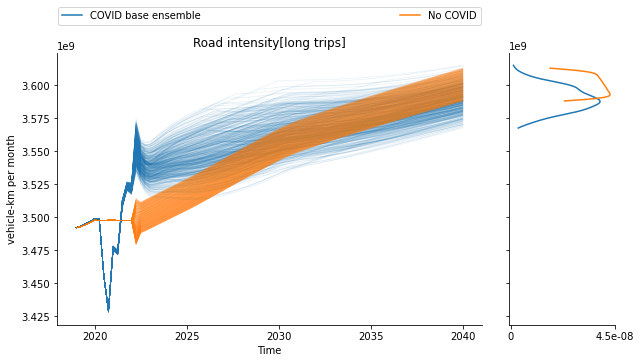

In [122]:
fig, _ = lines(experiments, outcomes,outcomes_to_show = "Road intensity[long trips]", density =Density.KDE, group_by = 'policy')

fig.set_size_inches(10,5)
ax = fig.get_axes()

ax[0].set_ylabel('vehicle-km per month')
for line in ax[0].get_lines():
    line.set_alpha(0.1)
    line.set_linewidth(0.7)
sns.despine()
plt.savefig('figs/policy/policy_inten_long')

### Trip purpose differences

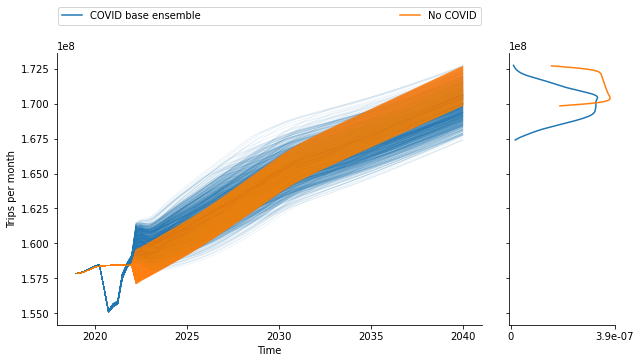

In [18]:
fig, _ = lines(experiments, outcomes,outcomes_to_show = "Monthly car movements per motive[commuting]", density =Density.KDE, group_by = 'policy', titles=False)

fig.set_size_inches(10,5)
ax = fig.get_axes()

ax[0].set_ylabel('Trips per month')
for line in ax[0].get_lines():
    line.set_alpha(0.1)
    line.set_linewidth(0.7)
sns.despine()
plt.savefig('figs/policy/policy_car_trips_commute.png')

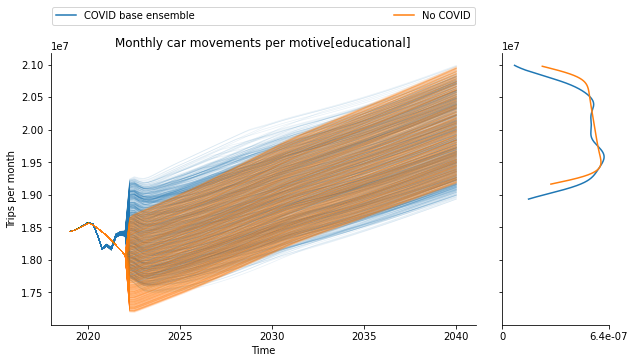

In [19]:
fig, _ = lines(experiments, outcomes,outcomes_to_show = "Monthly car movements per motive[educational]", density =Density.KDE, group_by = 'policy')

fig.set_size_inches(10,5)
ax = fig.get_axes()

ax[0].set_ylabel('Trips per month')
for line in ax[0].get_lines():
    line.set_alpha(0.1)
    line.set_linewidth(0.7)
sns.despine()
plt.savefig('figs/policy/policy_car_trips_edu.png')

## Congestion level
Congetion level in vehicles per month


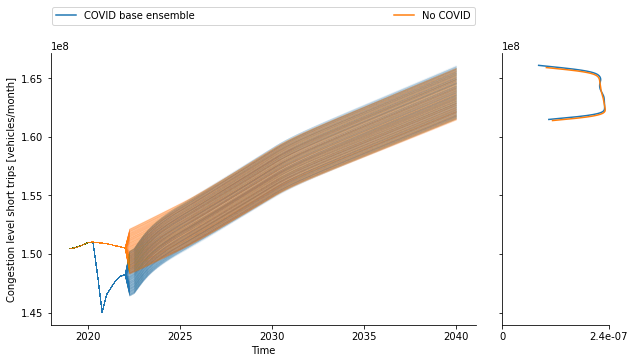

In [55]:
fig, _ = lines(experiments, outcomes,outcomes_to_show = "Vehicles per month on the road[short trips]", density =Density.KDE, group_by = 'policy', titles=False)

fig.set_size_inches(10,5)
ax = fig.get_axes()

ax[0].set_ylabel('Congestion level short trips [vehicles/month]')
for line in ax[0].get_lines():
    line.set_alpha(0.05)
    line.set_linewidth(0.5)
sns.despine()
plt.savefig('figs/policy/policy_congestion_short.png')

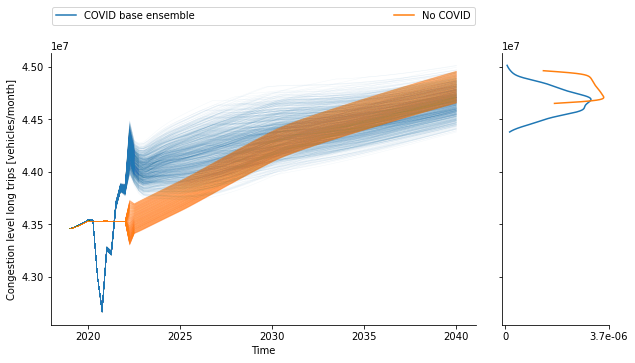

In [54]:
fig, _ = lines(experiments, outcomes,outcomes_to_show = "Vehicles per month on the road[long trips]", density =Density.KDE, group_by = 'policy', titles=False)

fig.set_size_inches(10,5)
ax = fig.get_axes()

ax[0].set_ylabel('Congestion level long trips [vehicles/month]')
for line in ax[0].get_lines():
    line.set_alpha(0.05)
    line.set_linewidth(0.5)
sns.despine()
plt.savefig('figs/policy/policy_congestion_long.png')

### Tele trips per motive


In [ ]:
fig, _ = lines(experiments, outcomes,outcomes_to_show = "Monthly tele movements per motive[commuting]", density =Density.KDE, group_by = 'policy', titles=False)

fig.set_size_inches(10,5)
ax = fig.get_axes()

ax[0].set_ylabel('Telecommuting trips per month [commuting] ')
for line in ax[0].get_lines():
    line.set_alpha(0.05)
    line.set_linewidth(0.5)
    
    
#ax[0].set(ylim=(25000000,45000000))     
sns.despine()
plt.savefig('figs/policy/policy_tele_commute.png')

In [ ]:
fig, _ = lines(experiments, outcomes,outcomes_to_show = "Monthly tele movements per motive[educational]", density =Density.KDE, group_by = 'policy', titles=False)

fig.set_size_inches(10,5)
ax = fig.get_axes()

ax[0].set_ylabel('Telecommuting trips per month [educational] ')
for line in ax[0].get_lines():
    line.set_alpha(0.05)
    line.set_linewidth(0.5)
    
#ax[0].set(ylim=(5000000,25000000))      
sns.despine()
plt.savefig('figs/policy/policy_tele_edu.png')